In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score, classification_report

from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif

In [33]:
df = pd.read_csv('customer_churn.csv')

In [34]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [35]:
df = df.drop(columns=['RowNumber'])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

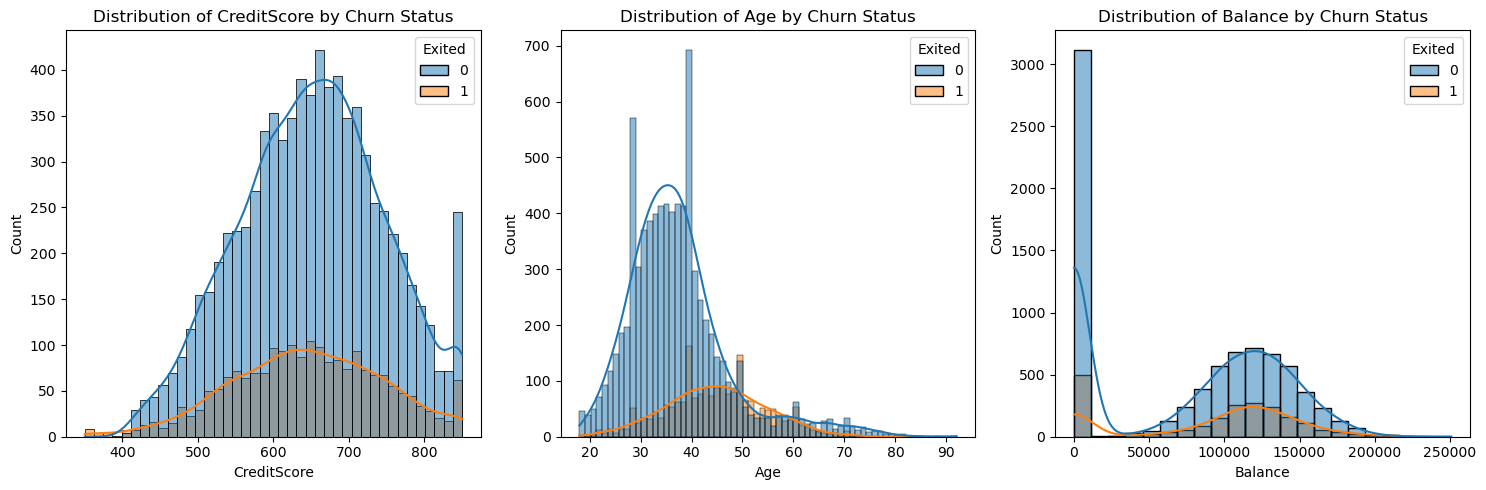

In [37]:
numerical_features = ['CreditScore', 'Age', 'Balance']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='Exited', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Churn Status')

plt.tight_layout()
plt.show()

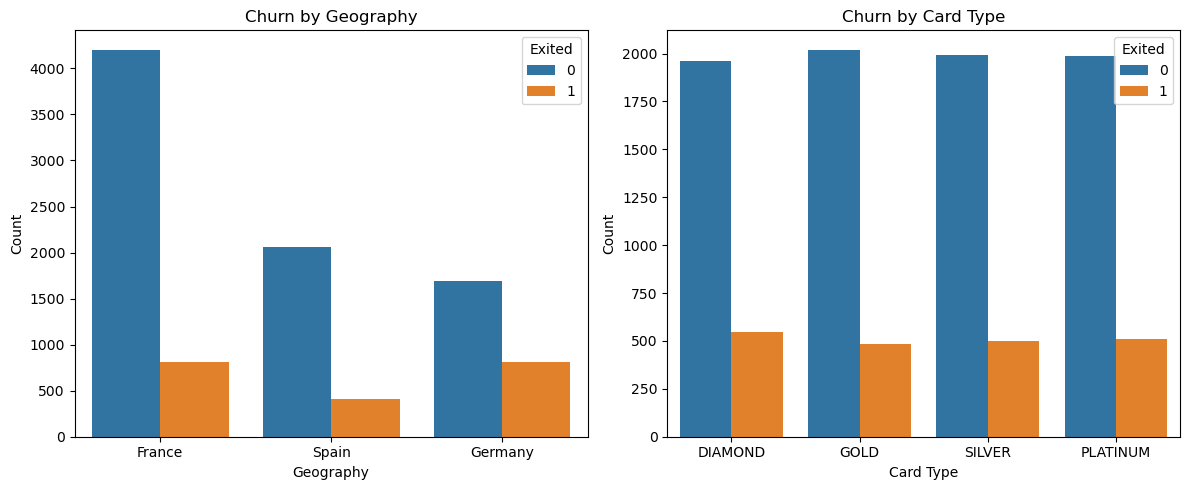

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features to plot
categorical_features = ['Geography', 'Card Type']

# Set up a figure with subplots for each feature
fig, axes = plt.subplots(1, len(categorical_features), figsize=(12, 5))

# Iterate over the features and create a countplot for each
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='Exited', ax=axes[i])
    axes[i].set_title(f'Churn by {feature}')
    axes[i].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [39]:
df_customer_id=df[['CustomerId','Surname']]

In [40]:
###data cleaning
df_cln= df.drop(columns=['Surname', 'CustomerId'])


In [41]:
df_cln

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [42]:
df_cln = pd.get_dummies(df_cln, columns=['Geography', 'Gender', 'Card Type']).astype(int)


In [43]:
df_cln

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0,1,1,1,101348,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660,3,1,0,113931,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369,1,1,1,101699,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0,1,0,1,42085,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075,2,1,0,92888,1,1,...,339,0,1,0,0,1,0,1,0,0


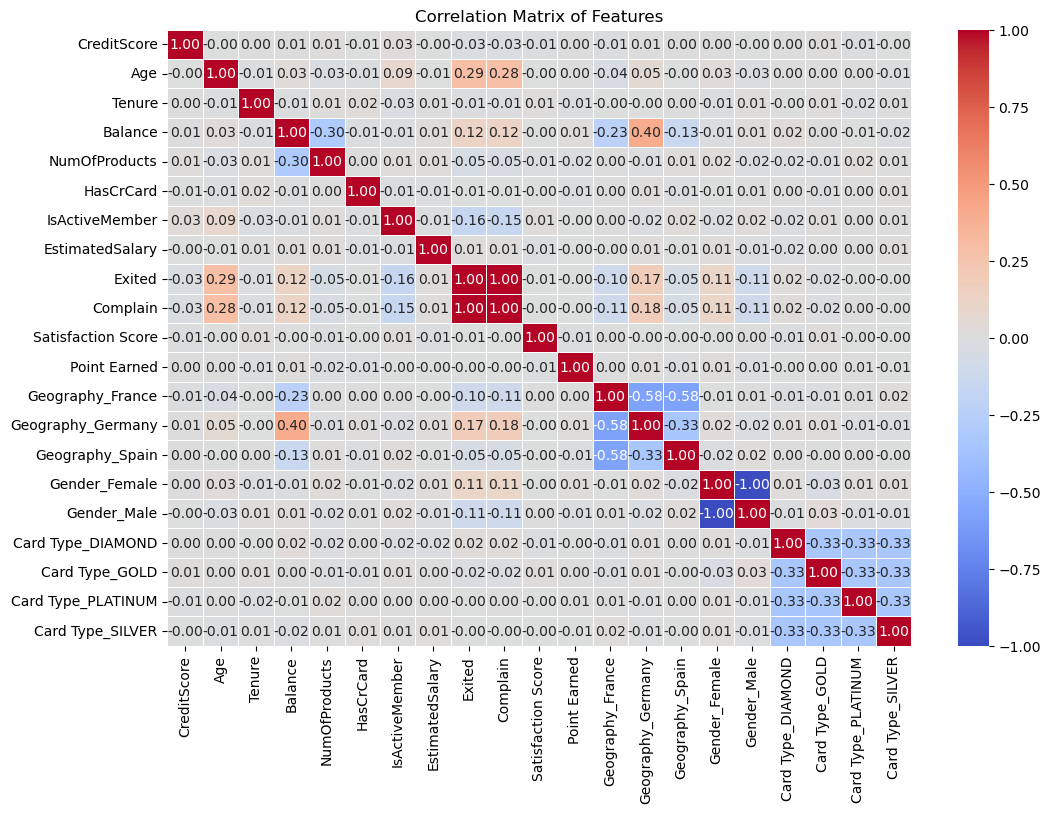

In [44]:
correlation_matrix = df_cln.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Matrix of Features')
plt.show()

In [60]:
##feature importance
#split x,y 

X=df_cln.drop('Exited', axis=1)
y=df_cln['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
classifier_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

classifier_rf.fit(X_train, y_train)
predictions_rf = classifier_rf.predict(X_test)


importance = pd.Series(classifier_rf.feature_importances_, index=list(X))

importance = importance.sort_values(ascending=False).head(25)



<Axes: >

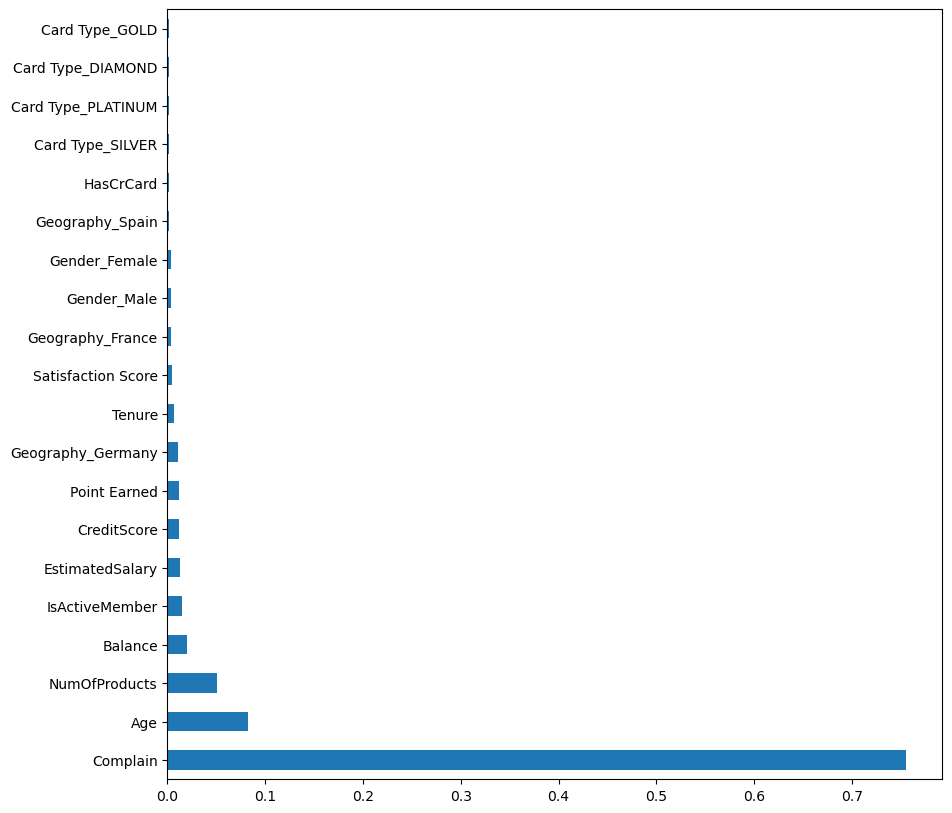

In [61]:
importance.plot.barh(figsize=(10,10))


In [62]:
X_imp=df_cln.drop(columns=['Exited', 'Complain'])
y_imp=df_cln['Exited']

X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp, y_imp, random_state=5)
classifier_rf2 = RandomForestClassifier(class_weight='balanced', random_state=42)

classifier_rf2.fit(X_imp_train, y_imp_train)
predictions_rf2 = classifier_rf2.predict(X_imp_test)


importance2 = pd.Series(classifier_rf2.feature_importances_, index=list(X_imp))

importance2 = importance2.sort_values(ascending=False).head(20)


<Axes: >

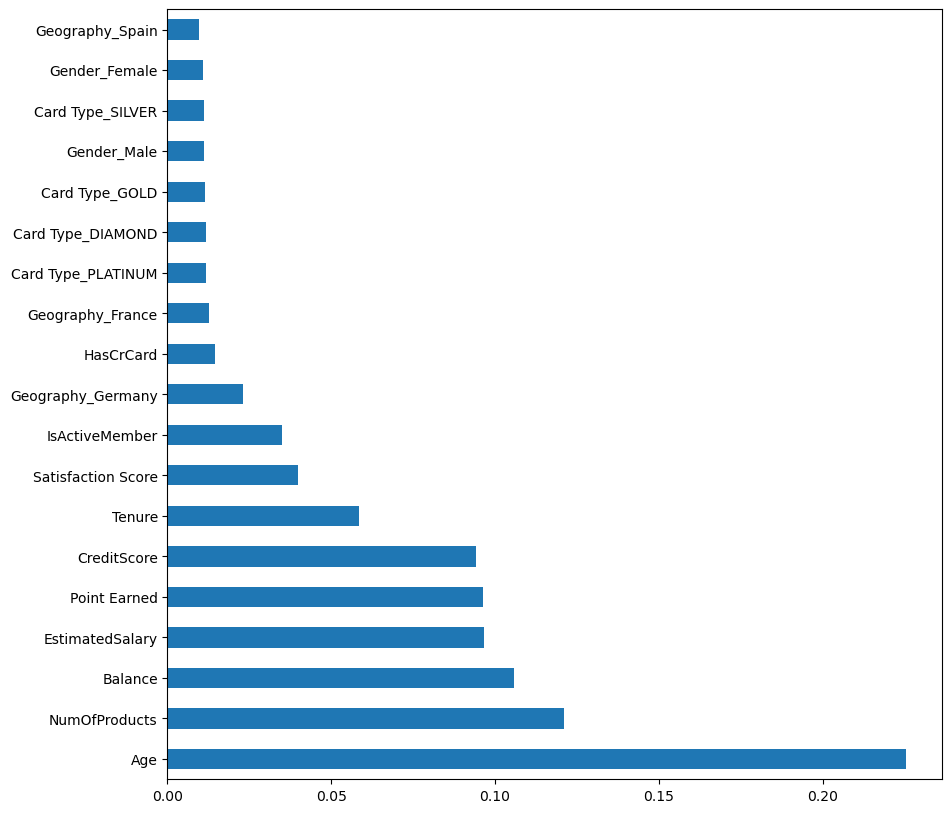

In [63]:
importance2.plot.barh(figsize=(10,10))



In [57]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [59]:
df_cln

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0,1,1,1,101348,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660,3,1,0,113931,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369,1,1,1,101699,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0,1,0,1,42085,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075,2,1,0,92888,1,1,...,339,0,1,0,0,1,0,1,0,0


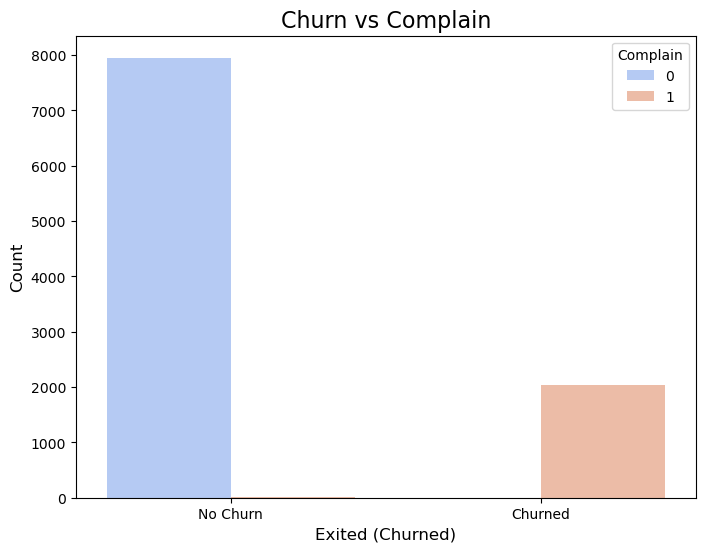

In [66]:


plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', hue='Complain', data=df, palette='coolwarm')

plt.title('Churn vs Complain', fontsize=16)
plt.xlabel('Exited (Churned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churned'])

# Display the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13616\1727080945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Tenure', data=df, palette='Set2')


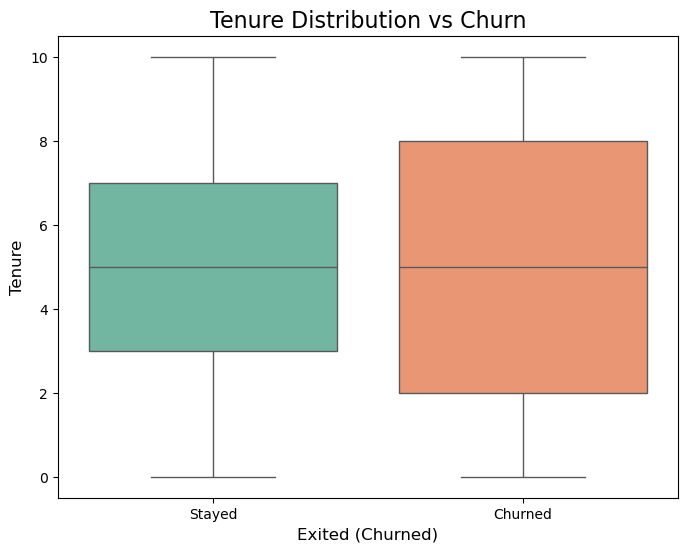

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Tenure', data=df, palette='Set2')
plt.title('Tenure Distribution vs Churn', fontsize=16)
plt.xlabel('Exited (Churned)', fontsize=12)
plt.ylabel('Tenure', fontsize=12)
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()


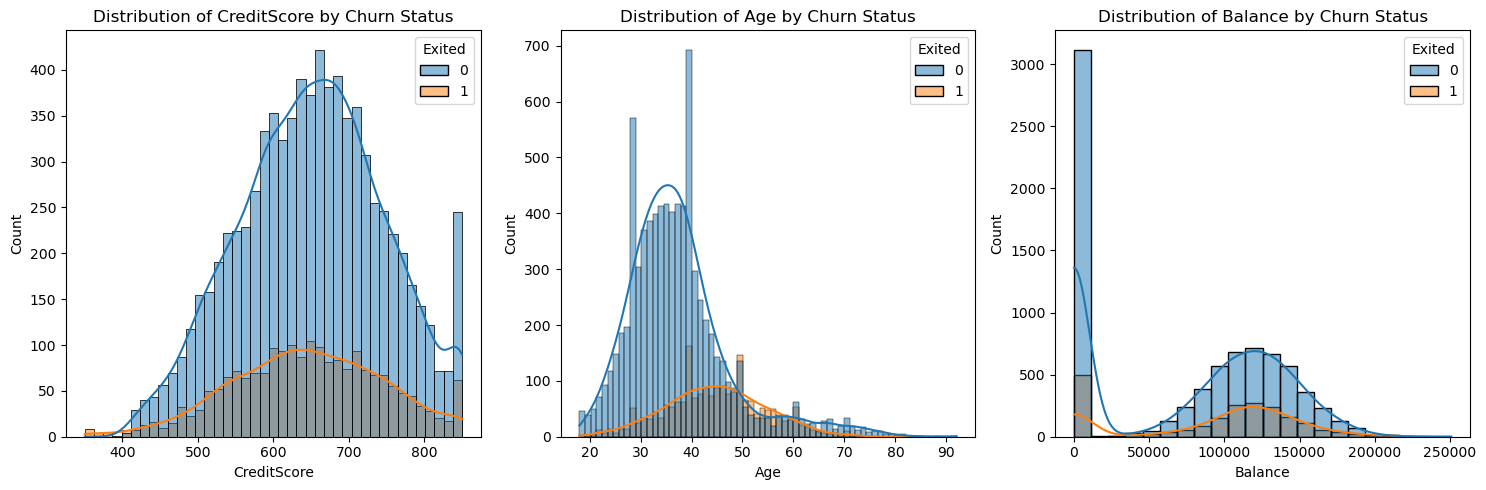

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features by churn status
numerical_features = ['CreditScore', 'Age', 'Balance']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='Exited', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Churn Status')

plt.tight_layout()
plt.show()


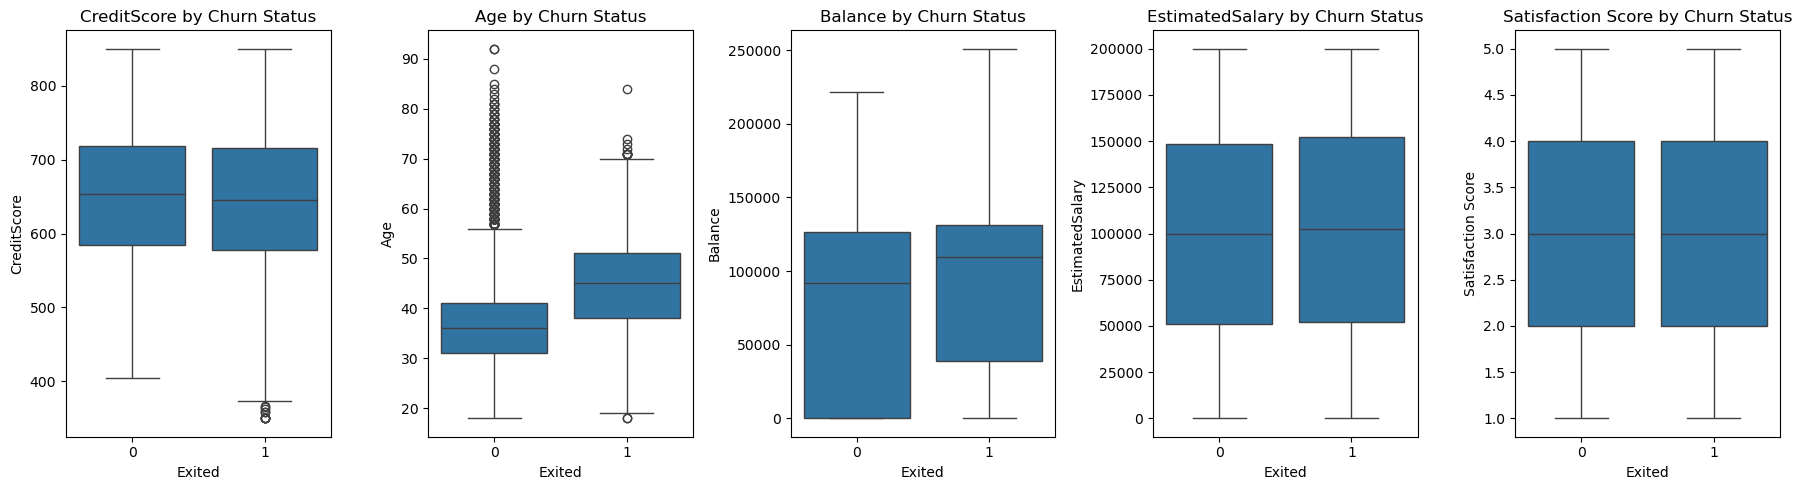

In [83]:
# Box plots for key numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Satisfaction Score']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Exited', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn Status')

plt.tight_layout()
plt.show()


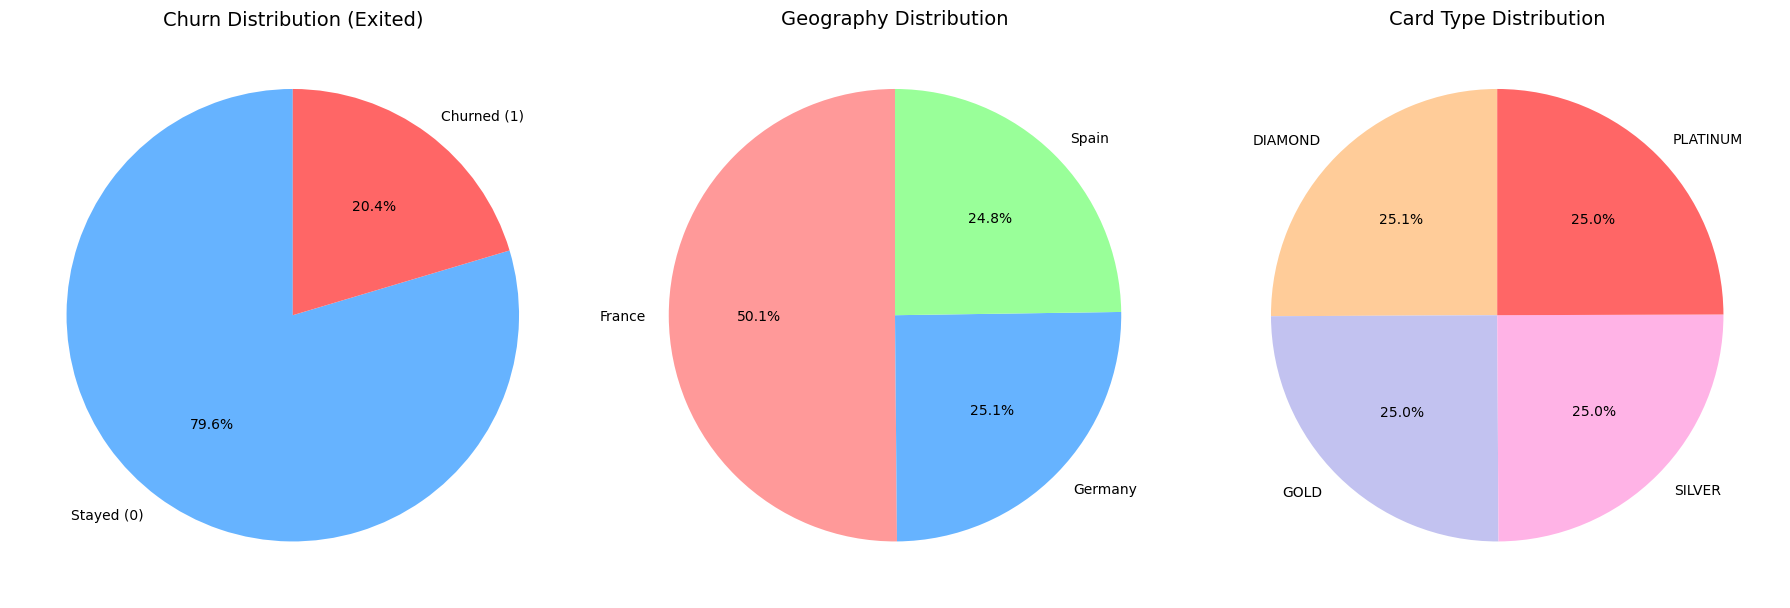

In [98]:
 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


churn_counts = df_eda['Exited'].value_counts()
axs[0].pie(churn_counts, labels=['Stayed (0)', 'Churned (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
axs[0].set_title('Churn Distribution (Exited)', fontsize=14)


geography_counts = df_eda['Geography'].value_counts()
axs[1].pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axs[1].set_title('Geography Distribution', fontsize=14)


card_type_counts = df_eda['Card Type'].value_counts()
axs[2].pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666'])
axs[2].set_title('Card Type Distribution', fontsize=14)


plt.tight_layout()

plt.show()

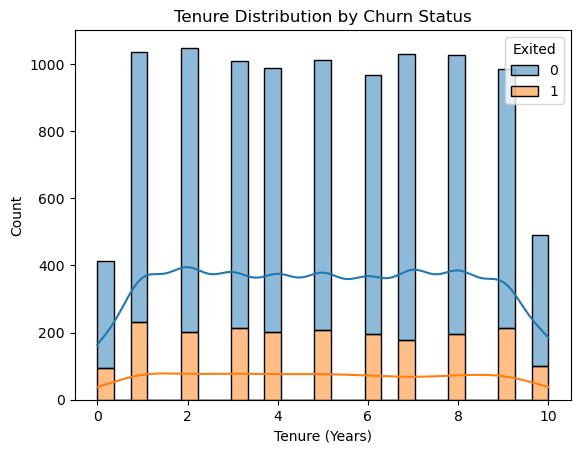

In [117]:
# Distribution of tenure by churn status
sns.histplot(data=df, x='Tenure', hue='Exited', multiple='stack', kde=True)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()


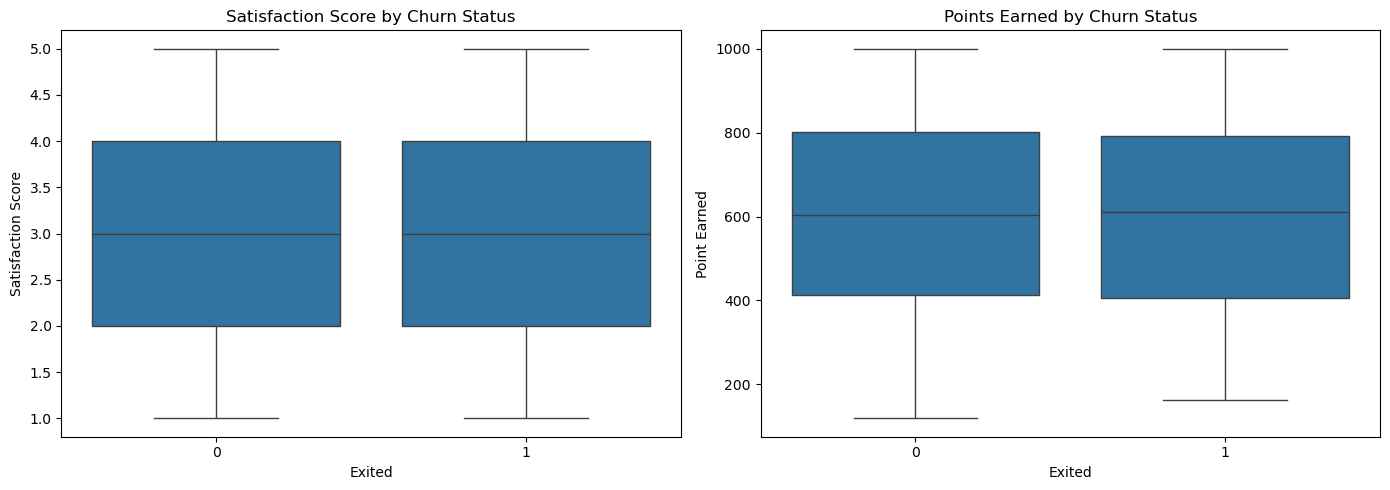

In [118]:
# Plot Satisfaction Score and Points by churn status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='Exited', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Satisfaction Score by Churn Status')
sns.boxplot(x='Exited', y='Point Earned', data=df, ax=axes[1])
axes[1].set_title('Points Earned by Churn Status')

plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13616\339065984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y='Balance', data=df_eda, palette='Set2')


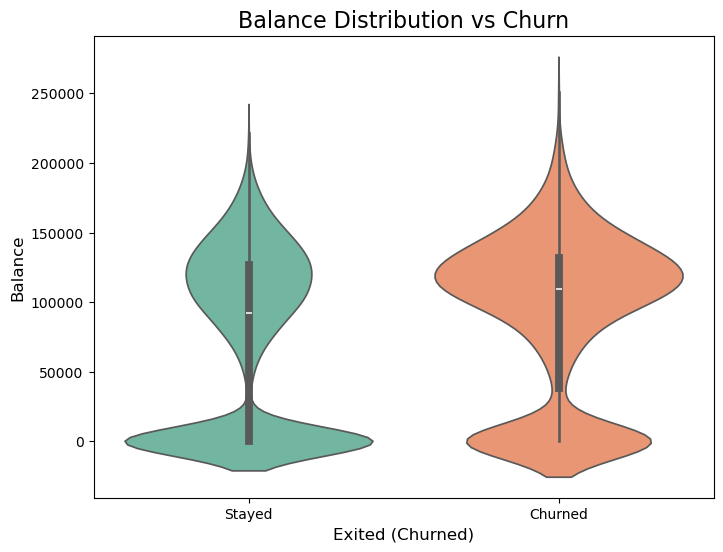

In [123]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Exited', y='Balance', data=df_eda, palette='Set2')
plt.title('Balance Distribution vs Churn', fontsize=16)
plt.xlabel('Exited (Churned)', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13616\1022911821.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_exited_counts = df_eda.groupby(['Age_Category', 'Exited']).size().unstack()


<Figure size 1000x600 with 0 Axes>

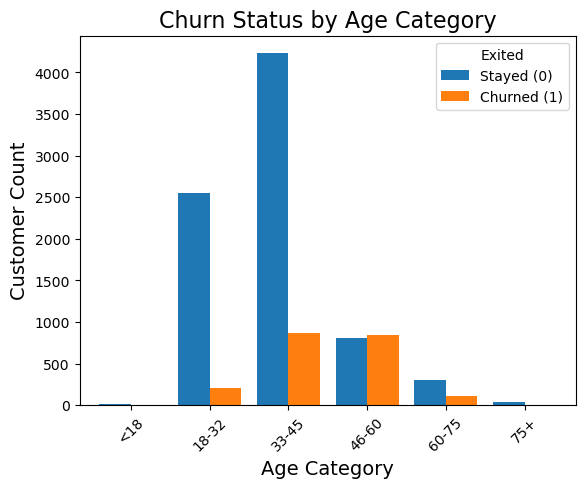

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of exited and non-exited customers by Age_Category
age_exited_counts = df_eda.groupby(['Age_Category', 'Exited']).size().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
age_exited_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('Churn Status by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.xticks(rotation=45)
plt.show()



In [129]:
df_eda

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Cluster,Age_Category,AgeCategory
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,33-45,33-45
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,2,33-45,33-45
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,2,33-45,33-45
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,33-45,33-45
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0,33-45,33-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,1,33-45,33-45
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,2,33-45,33-45
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,1,33-45,33-45
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,0,33-45,33-45


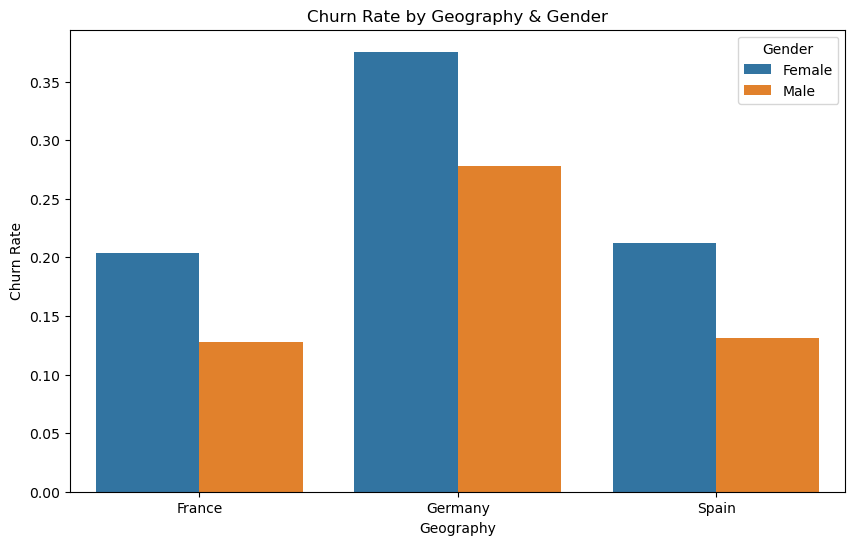

In [141]:
plt.figure(figsize =(10,6))

churn_rate_geo_gender = df.groupby(['Geography','Gender'])['Exited'].mean().reset_index(name="Churn Rate")
sns.barplot(data=churn_rate_geo_gender, x= 'Geography', y= 'Churn Rate', hue='Gender')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Geography & Gender')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13616\465677052.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



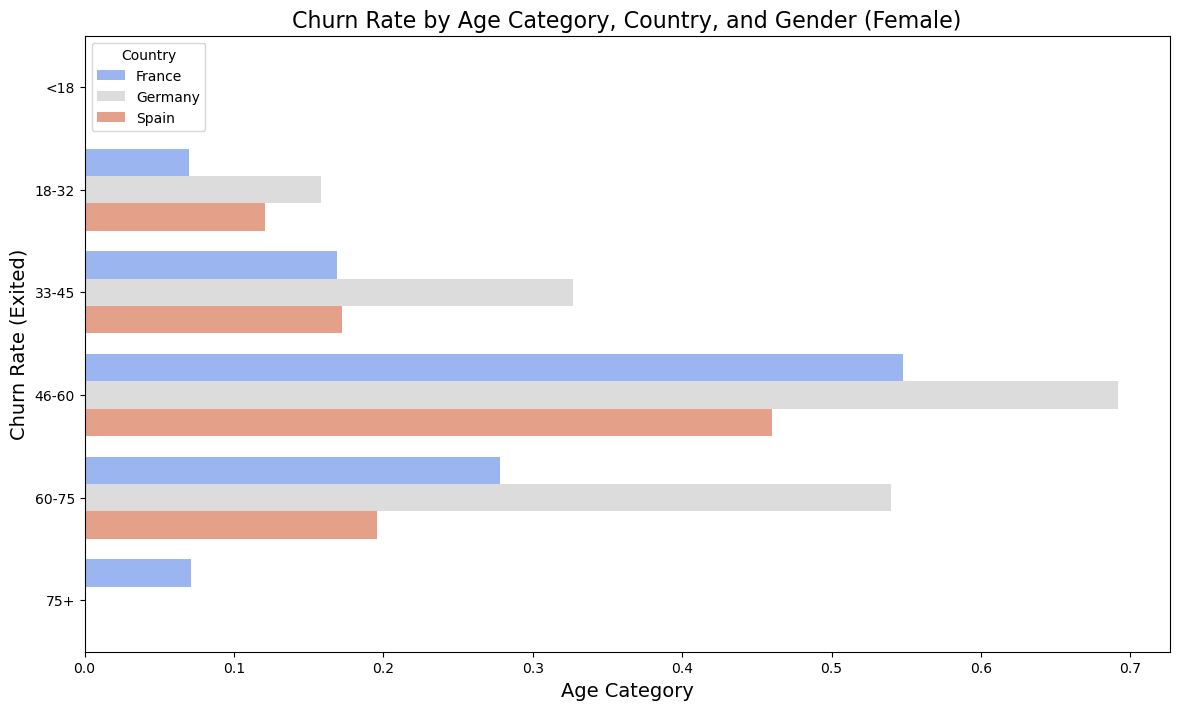

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns


female_df = df_eda[df_eda['Gender'] == 'Female']

churn_rate_by_age_country = female_df.groupby(['Age_Category', 'Geography'])['Exited'].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.barplot(data=churn_rate_by_age_country, x='Exited', y='Age_Category', hue='Geography', palette='coolwarm')


plt.title('Churn Rate by Age Category, Country, and Gender (Female)', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Churn Rate (Exited)', fontsize=14)
plt.legend(title='Country', loc='upper left')


plt.show()


   Country  Customer_Count
0   France            5014
1  Germany            2509
2    Spain            2477


In [155]:

churn_complaints = df[(df['Exited'] == 1) & (df['Complain'] == 1)].shape[0]
total_churned = df[df['Exited'] == 1].shape[0]

complain_churn_rate = (churn_complaints / total_churned) * 100
print(f"Percentage of churned customers with complaints: {complain_churn_rate:.2f}%")


Percentage of churned customers with complaints: 99.80%


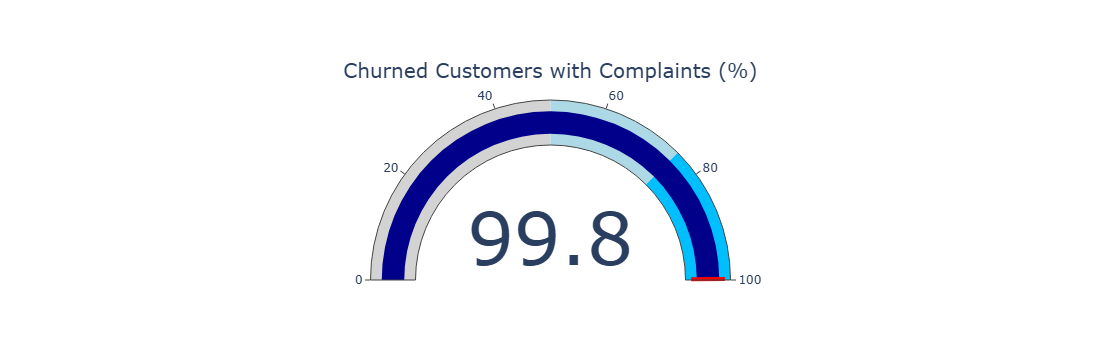

In [157]:
import plotly.graph_objects as go
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=complain_churn_rate,
    title={'text': "Churned Customers with Complaints (%)"},
    gauge={
        'axis': {'range': [0, 100]},  # 0 to 100 percent
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "lightgray"},
            {'range': [50, 75], 'color': "lightblue"},
            {'range': [75, 100], 'color': "deepskyblue"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': complain_churn_rate  # Mark the percentage value
        }
    }
))

fig.show()